### Step 1: Data set import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("############################## DESCRIPTION OF DATASET (TRAIN) ##############################")
print(df_train.info())

############################## DESCRIPTION OF DATASET (TRAIN) ##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Step 3: Checking age distribution

<AxesSubplot:xlabel='Age_train', ylabel='Density'>

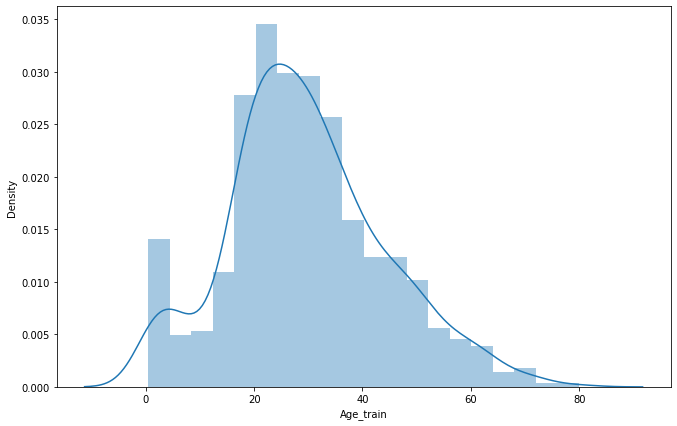

In [4]:
plt.figure(figsize = (11,7))
sns.distplot(x = df_train["Age"], axlabel = "Age_train")

In [6]:
print("Mean of age on training training: ", df_train["Age"].mean())
print("Median of age on training dataset: ", df_train["Age"].median())

Mean of age on training training:  29.69911764705882
Median of age on training dataset:  28.0


### Step 4: Fill missing values of age for the median

In [7]:
median_train    = df_train["Age"].median()
df_train["Age"] = df_train["Age"].fillna(median_train)     

### Step 5: Checking Target proportion

<AxesSubplot:xlabel='Survived', ylabel='count'>

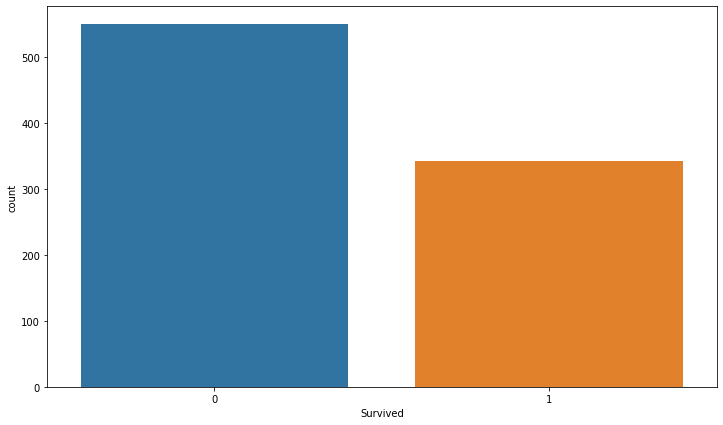

In [8]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df_train, x = "Survived")

### Step 5: Proportion of classifications in each classificatory variable 

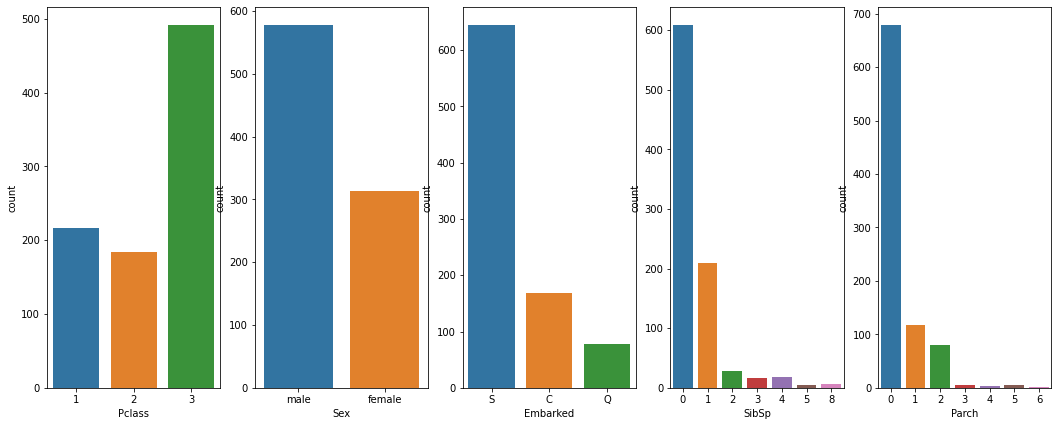

In [9]:
class_var = ["Pclass", "Sex", "Embarked", "SibSp", "Parch"]

n = 1
m = 5

fig, ax = plt.subplots(n, m, figsize = (18, 7))

for i, ax in enumerate(fig.axes):
    sns.countplot(data = df_train, x = class_var[i], ax = ax)


### Step 6: Evaluation of possible correlations between independent variables and Target

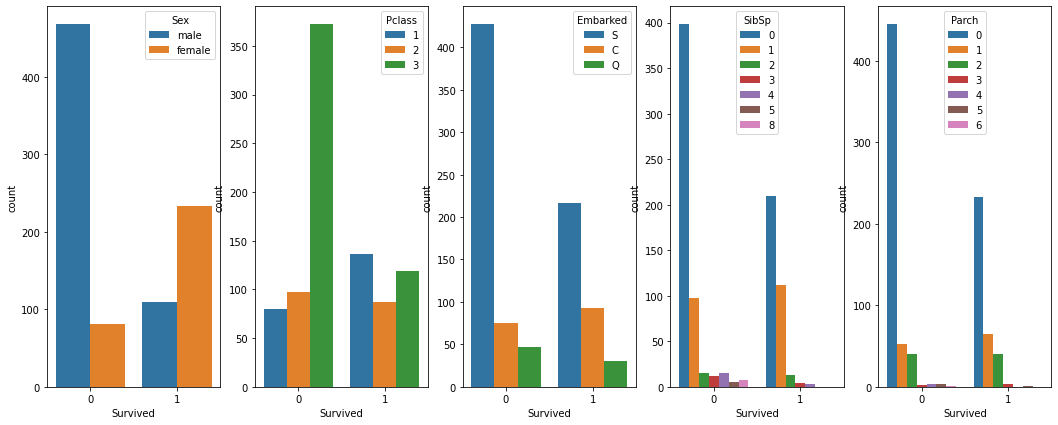

In [10]:
n = 1
m = 5

fig, ax = plt.subplots(n, m, figsize = (18, 7))
hue = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for i, ax in enumerate(fig.axes):
    sns.countplot(x = "Survived", hue = hue[i], data = df_train, ax = ax)

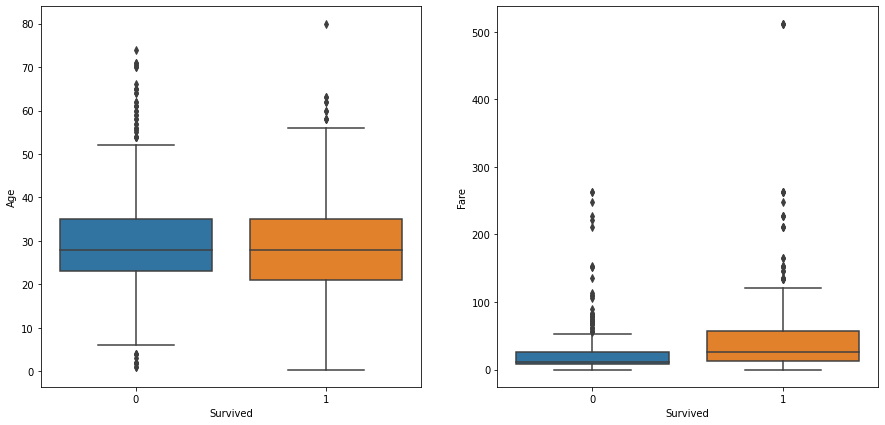

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
columns = ["Age", "Fare"]

for i, ax in enumerate(fig.axes):
    sns.boxplot(x = "Survived", y = columns[i], data = df_train, ax = ax)

The box plot for the variable age reveals a weak correlation with target 

### Step 7: Evaluation of possible correlations among independent variables

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

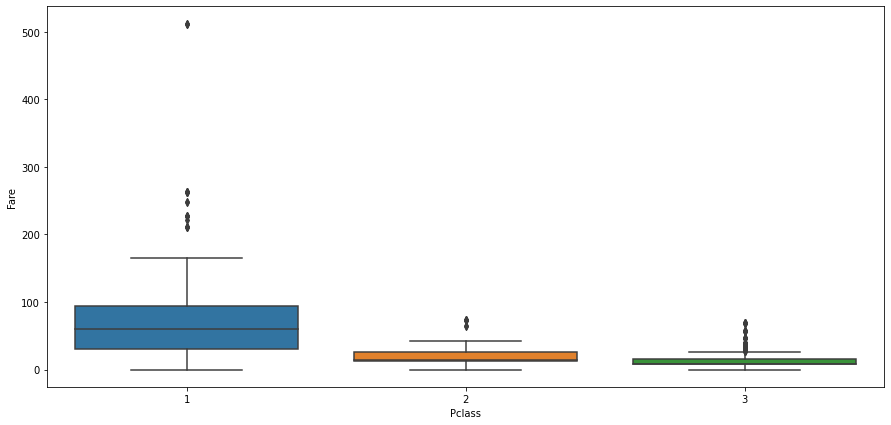

In [12]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "Pclass", y = "Fare", data = df_train)

### Step 8: Machine learning model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

#-------------------------------- Categorical into numerical variable -------------------------------#
df_train["new_Sex"] = df_train["Sex"].map({"female": 0, "male": 1})

names = ["Pclass", "new_Sex", "Fare"]

#---------------------- Erasing missing values for Embarked ---------------------#
new_df = df_train[names]
target = df_train["Survived"]


#--------------------Split dataset into train and test--------------------------#
x_train, x_test, y_train, y_test = train_test_split(new_df, target,
                                                   test_size= 0.3, random_state= 111)

#------------------------------ Model adjust ------------------------------------#
RFC = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = "entropy",
                            random_state = 10)


model = RFC.fit(x_train, y_train)


#-------------------- Prediction with train dataset -----------------------------#
prev_train = model.predict(x_train)

#-------------------- Prediction with test dataset -----------------------------#
prev_test = model.predict(x_test)

#---------------------- Train dataset accuracy ----------------------------#
accur_train = accuracy_score(y_train, prev_train)

#---------------------- Test dataset accuracy ----------------------------#
accur_test = accuracy_score(y_test, prev_test)

#---------------------- Train dataset confusion matrix ----------------------------#
matrix_train = confusion_matrix(y_train, prev_train)

#---------------------- Test dataset confusion matrix ----------------------------#
matrix_test = confusion_matrix(y_test, prev_test)


print("Accuracy in train dataset: ", accur_train)
print("###################### Confusion Matrix (train) #########################")
print(matrix_train)

print("")
print("Accuracy in test dataset: ", accur_test)
print("###################### Confusion Matrix (test) #########################")
print(matrix_test)

/home/arley/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


Accuracy in train dataset:  0.8523274478330658
###################### Confusion Matrix (train) #########################
[[353  25]
 [ 67 178]]

Accuracy in test dataset:  0.8395522388059702
###################### Confusion Matrix (test) #########################
[[157  14]
 [ 29  68]]


### Step 9: Balancing Target variable

In [14]:
from imblearn.over_sampling import SMOTEN

<AxesSubplot:xlabel='Survived', ylabel='count'>

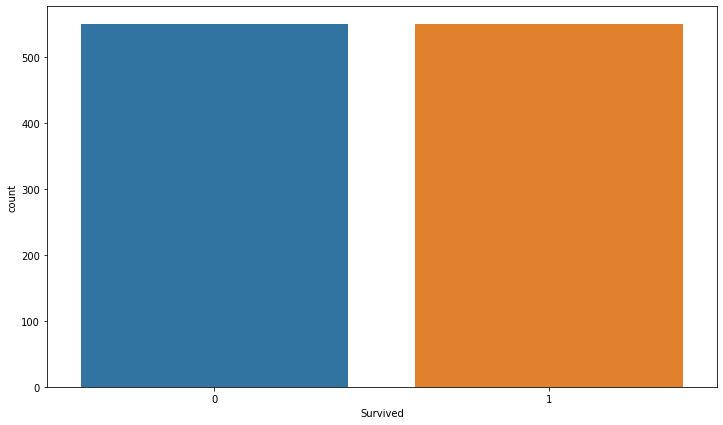

In [15]:
oversample = SMOTEN()
x, y = oversample.fit_resample(new_df, target)

plt.figure(figsize = (12, 7))
sns.countplot(x = y)

### Step 8: Machine learning model with balacend data train

In [16]:
#---------------------- Erasing missing values for Embarked ---------------------#
new_df = x
target = y


#--------------------Separando dados de treino e teste--------------------------#
x_train, x_test, y_train, y_test = train_test_split(new_df, target,
                                                   test_size= 0.3, random_state= 111)

#------------------------------ Model adjust ------------------------------------#
RFC = RandomForestClassifier(criterion = "entropy", 
                             random_state = 0)

model = RFC.fit(x_train, y_train)


#-------------------- Prediction with train dataset -----------------------------#
prev_train = model.predict(x_train)

#-------------------- Prediction with test dataset -----------------------------#
prev_test = model.predict(x_test)

#---------------------- Train dataset accuracy ----------------------------#
accur_train = accuracy_score(y_train, prev_train)

#---------------------- Test dataset accuracy ----------------------------#
accur_test = accuracy_score(y_test, prev_test)

#---------------------- Train dataset confusion matrix ----------------------------#
matrix_train = confusion_matrix(y_train, prev_train)

#---------------------- Test dataset confusion matrix ----------------------------#
matrix_test = confusion_matrix(y_test, prev_test)


print("Accuracy in train dataset: ", accur_train)
print("###################### Confusion Matrix (train) #########################")
print(matrix_train)

print("")
print("Accuracy in test dataset: ", accur_test)
print("###################### Confusion Matrix (test) #########################")
print(matrix_test)

Accuracy in train dataset:  0.9010416666666666
###################### Confusion Matrix (train) #########################
[[356  32]
 [ 44 336]]

Accuracy in test dataset:  0.8757575757575757
###################### Confusion Matrix (test) #########################
[[141  20]
 [ 21 148]]
